In [1]:
#DELIVERABLE FOR THE PROJECT "LANDSCAPE INDICATORS FOR SUSTAINABLE INTENSIFICATION"



In [2]:
#Copyright <2018> <David Pastor Escuredo>

#Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

#The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

#THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [3]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import re
import networkx as nx
import matplotlib.pyplot as plt
import datetime
import collections
from sklearn.cluster import KMeans

In [4]:
selector=4
fsize=20
domean=0

In [5]:
if selector==1:
    postfile='posts_dakar.xls'
    tag='-dakar'
    
if selector==2:
    postfile='posts_montpellier.xls'
    tag='-montpellier'
    limit=8128
    if domean:
        ymax=20
    else:
        ymax=200
    
    xmax=90
    
    f_s=27
    f_e=30
    f_c=29
    
    i_s=30
    i_e=60
    
    ll=120
    li=0
    lf=120
    
if selector==4:
    postfile='posts_houston.xls'
    tag='-houston'
    limit=9000
    
    if domean:
        ymax=40
    else:
        ymax=400
    
    xmax=31
    i_s=1
    i_e=29
    f_s=1
    f_e=0
    f_c=0
    ll=30
    li=0
    lf=30
    
if selector==5:
    postfile='posts_mocoa.xls'
    tag='-mocoa'
    



In [467]:
print(tag)

-houston


In [468]:
xls=pd.ExcelFile('CH/'+postfile)
sheet1=xls.parse(0)



In [469]:
print(len(sheet1))
print(postfile)

9362
posts_houston.xls


In [470]:
Dt=sheet1['Date (GMT)']
C=sheet1['Contents']
U=sheet1['Author']
cat=sheet1['Category']
GE=sheet1['Gender']
P=sheet1['Posts']
F=sheet1['Followers']
FF=sheet1['Following']
print(Dt[0])


2017-09-29 03:53:51


In [471]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

In [472]:
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

def transform_date(x):
    print(x.year)
    d = datetime.datetime.strptime(x, "%Y-%m-%d  %H:%M:%S")
    print(d.year)
    print(d.day)
    print(d.month)
    return 

In [473]:
def date2index(d):
    mr=d.month-9
    m=[0, 30, 61, 91, 122]
    ir=(d.day+m[mr]-1)*24+d.hour
    ir=d.day+m[mr]
    return ir

In [474]:
dd=dict()
do=dict()
dr=dict()
dronly=dict()
DArray=[]
count=0
countR=0

for i in range(0,limit):#len(sheet1)+1):
    #print(i)
    #print(C[i])
    #ix = C[i].find('RT @')
    terms_rt = [term for term in preprocess(C[i]) 
              if term.startswith('@')]
    print(terms_rt)
    if len(terms_rt)>0:
        countR=countR+1
     #   print(U[i])
     #   print(terms_rt)
        if not U[i] in dd:

            dd[U[i]]=[]
            dd[U[i]]=count
            do[U[i]]=[]
            do[U[i]]=count
            print(count)
            count=count+1
            
            Desc=collections.OrderedDict()
            x=date2index(Dt[i])
            Desc['followers']=F[i]
            Desc['following']=FF[i]
            Desc['posts']=P[i]
            #Desc[x]=dd[terms_rt]
            DArray.append(Desc)
            print(Desc)
            print(len(DArray))
            print('hola2')
            print(U[i])
            print('hola3')
            
iii=0
count2=0
for i in range(0,limit):#len(sheet1)+1):
    #print(i)
    #print(C[i])
    #ix = C[i].find('RT @')
    terms_rt = [term for term in preprocess(C[i]) 
              if term.startswith('@')]
    print(terms_rt)
    if len(terms_rt)>0:
        countR=countR+1   
        di=date2index(Dt[i])
        mm=max(iii,x)
        iii=mm
        for ii in range(0,len(terms_rt)):
            if not terms_rt[ii] in dr:
                #dd[terms_rt[ii]]=[]
                #dd[terms_rt[ii]]=count
                if terms_rt[ii] in dd:
                    dr[terms_rt[ii]]=[]
                    dr[terms_rt[ii]]=dd[terms_rt[ii]]
                else:
                    dr[terms_rt[ii]]=[]
                    dr[terms_rt[ii]]=count
                    dronly[terms_rt[ii]]=[]
                    dronly[terms_rt[ii]]=count
                #count=count+1
                    count=count+1
            print(do[U[i]])
            X=DArray[do[U[i]]]
            print(X)
            X.update({di:dr[terms_rt[ii]]})
            
print(mm)
print(count2)
print(count)



['@YoPhoebs']
0
OrderedDict([('followers', 366.0), ('following', 1006.0), ('posts', 15894.0)])
1
hola2
@briannaa_ashlee
hola3
['@MichaelSkolnik', '@realDonaldTrump']
1
OrderedDict([('followers', 427.0), ('following', 340.0), ('posts', 12596.0)])
2
hola2
@creatorofwhat
hola3
['@KimKardashian']
2
OrderedDict([('followers', 1411.0), ('following', 359.0), ('posts', 30820.0)])
3
hola2
@mamacitaa47
hola3
['@WorIdStarComedy']
3
OrderedDict([('followers', 258.0), ('following', 202.0), ('posts', 4565.0)])
4
hola2
@fany_htx
hola3
[]
['@abc13houston']
4
OrderedDict([('followers', 4972.0), ('following', 2766.0), ('posts', 183498.0)])
5
hola2
@da1don
hola3
['@ReadyHarris']
5
OrderedDict([('followers', 75.0), ('following', 259.0), ('posts', 137.0)])
6
hola2
@tnmoore520
hola3
['@DanLindsey77']
6
OrderedDict([('followers', 100.0), ('following', 109.0), ('posts', 337.0)])
7
hola2
@HurricaneManna
hola3
['@memeprovider']
7
OrderedDict([('followers', 191.0), ('following', 159.0), ('posts', 2605.0)])
8
hol

168
OrderedDict([('followers', 734.0), ('following', 494.0), ('posts', 8943.0)])
169
hola2
@Mvricruz_
hola3
['@HoustonChron']
169
OrderedDict([('followers', 287.0), ('following', 180.0), ('posts', 79171.0)])
170
hola2
@0biwannnnnnnn
hola3
[]
['@Kzguns']
170
OrderedDict([('followers', 1375.0), ('following', 1715.0), ('posts', 33454.0)])
171
hola2
@DrAmandaMay
hola3
['@coachross525']
171
OrderedDict([('followers', 633.0), ('following', 393.0), ('posts', 7554.0)])
172
hola2
@IamSelfMadee_
hola3
['@OfficialBils']
172
OrderedDict([('followers', 322.0), ('following', 284.0), ('posts', 15486.0)])
173
hola2
@mOmO_mOsO
hola3
[]
['@kibblesmith']
173
OrderedDict([('followers', 981.0), ('following', 1091.0), ('posts', 19561.0)])
174
hola2
@Andrewdgoat
hola3
[]
['@samanthakubota', '@KHOU']
174
OrderedDict([('followers', 3335.0), ('following', 2912.0), ('posts', 998749.0)])
175
hola2
@DynamoCooligan
hola3
['@RoxanneFranco', '@elpie', '@deejayeasya']
175
OrderedDict([('followers', 14.0), ('following'

hola3
['@savagenena']
396
OrderedDict([('followers', 473.0), ('following', 346.0), ('posts', 8581.0)])
397
hola2
@Juice_BH
hola3
['@JustCourtnei']
397
OrderedDict([('followers', 392.0), ('following', 799.0), ('posts', 5560.0)])
398
hola2
@kenken_cutte
hola3
['@TexasTribune']
398
OrderedDict([('followers', 108.0), ('following', 393.0), ('posts', 2953.0)])
399
hola2
@TheCodeFoundry
hola3
['@bballvines']
399
OrderedDict([('followers', 4.0), ('following', 48.0), ('posts', 8.0)])
400
hola2
@TreyAda67282189
hola3
['@McClain_on_NFL', '@deshaunwatson']
400
OrderedDict([('followers', 883.0), ('following', 763.0), ('posts', 768.0)])
401
hola2
@13PhotogChris
hola3
['@abc13houston']
401
OrderedDict([('followers', 428.0), ('following', 306.0), ('posts', 11101.0)])
402
hola2
@dannibrown_1219
hola3
['@canonmote']
402
OrderedDict([('followers', 1721.0), ('following', 1902.0), ('posts', 27068.0)])
403
hola2
@xmxlisa
hola3
['@rios_shelia']
403
OrderedDict([('followers', 896.0), ('following', 612.0), ('p

OrderedDict([('followers', 134.0), ('following', 172.0), ('posts', 1530.0)])
671
hola2
@travis_neill
hola3
['@kaitlinmonte']
671
OrderedDict([('followers', 95.0), ('following', 346.0), ('posts', 3412.0)])
672
hola2
@J_Anklesaria
hola3
[]
['@DTGoteraKHOU', '@Academy']
672
OrderedDict([('followers', 691.0), ('following', 511.0), ('posts', 6009.0)])
673
hola2
@kirstynspeich
hola3
['@Clayton_Sandell', '@abc']
673
OrderedDict([('followers', 220.0), ('following', 460.0), ('posts', 1579.0)])
674
hola2
@AggLE92
hola3
['@yaflare', '@lakewoodya', '@lakewoodya', '@nicknilson', '@ramirogarcia']
674
OrderedDict([('followers', nan), ('following', nan), ('posts', nan)])
675
hola2
Andres Lopez
hola3
['@YoungDems4Trump']
675
OrderedDict([('followers', 1181.0), ('following', 4997.0), ('posts', 46615.0)])
676
hola2
@GerardoHGarcia
hola3
['@SenatorDurbin']
['@melissaahh7']
676
OrderedDict([('followers', 286.0), ('following', 191.0), ('posts', 1265.0)])
677
hola2
@sstephaniegr
hola3
['@AnniseParker']
677
O

hola2
@kylenervasquez
hola3
['@PIN_VID']
940
OrderedDict([('followers', 328.0), ('following', 249.0), ('posts', 6086.0)])
941
hola2
@genesis_gaytan7
hola3
['@KeearaLaChae']
941
OrderedDict([('followers', 556.0), ('following', 1173.0), ('posts', 8144.0)])
942
hola2
@durant_not_here
hola3
['@realdonaldtrump', '@donaldjtrumpjr', '@erictrump', '@cnn']
942
OrderedDict([('followers', nan), ('following', nan), ('posts', nan)])
943
hola2
Ybarra Houston
hola3
['@LCARS_TechGuy', '@stormresist2017', '@realDonaldTrump']
['@InvestorIdeas']
943
OrderedDict([('followers', 1.0), ('following', 659.0), ('posts', 497.0)])
944
hola2
@dmitritsbycen2g
hola3
['@RandomAnimator']
944
OrderedDict([('followers', 116.0), ('following', 90.0), ('posts', 1204.0)])
945
hola2
@misterjulian15
hola3
[]
[]
['@FreddyAmazin']
945
OrderedDict([('followers', 103.0), ('following', 131.0), ('posts', 3749.0)])
946
hola2
@_evelyndenise04
hola3
['@Trey3stiff_']
946
OrderedDict([('followers', 1462.0), ('following', 1240.0), ('post

hola3
['@KingWheatXVI']
1202
OrderedDict([('followers', 162.0), ('following', 198.0), ('posts', 9633.0)])
1203
hola2
@chris_sanabriaa
hola3
['@BlackPplVines']
1203
OrderedDict([('followers', 1190.0), ('following', 215.0), ('posts', 106606.0)])
1204
hola2
@Ms__alma
hola3
['@sweetestsara']
1204
OrderedDict([('followers', 210.0), ('following', 183.0), ('posts', 7941.0)])
1205
hola2
@alexdoeeee
hola3
['@SylvesterTurner']
[]
['@HoustonTexans']
1205
OrderedDict([('followers', 468.0), ('following', 420.0), ('posts', 4772.0)])
1206
hola2
@jackiesnz_
hola3
['@APCentralRegion']
1206
OrderedDict([('followers', 1104.0), ('following', 891.0), ('posts', 10317.0)])
1207
hola2
@gvlovelady
hola3
['@NWSHouston']
['@DocWoc71']
[]
[]
['@TeaPainUSA']
1207
OrderedDict([('followers', 472.0), ('following', 390.0), ('posts', 23052.0)])
1208
hola2
@marymorrtamu85
hola3
['@rayofgothshine']
1208
OrderedDict([('followers', 50.0), ('following', 346.0), ('posts', 2064.0)])
1209
hola2
@beinghuman1993
hola3
['@Adriann

hola3
[]
[]
[]
[]
['@SenBlumenthal', '@nita2293']
1468
OrderedDict([('followers', 484.0), ('following', 1218.0), ('posts', 5629.0)])
1469
hola2
@farrukh_shamsi
hola3
[]
['@brenebrown', '@brenebrown']
1469
OrderedDict([('followers', nan), ('following', nan), ('posts', nan)])
1470
hola2
Angela Williams Stillwell
hola3
[]
['@Marissa_Barrera']
1470
OrderedDict([('followers', 828.0), ('following', 490.0), ('posts', 27246.0)])
1471
hola2
@JaayLoww_
hola3
['@SuperStrokeGolf']
1471
OrderedDict([('followers', 238.0), ('following', 436.0), ('posts', 3733.0)])
1472
hola2
@Big_Time_South
hola3
['@FinnSkata']
1472
OrderedDict([('followers', 428.0), ('following', 630.0), ('posts', 15861.0)])
1473
hola2
@jegomez__
hola3
['@AnniseParker']
1473
OrderedDict([('followers', 3398.0), ('following', 1042.0), ('posts', 4138.0)])
1474
hola2
@rfelliott
hola3
['@jokoch09', '@Kingwood_VB']
1474
OrderedDict([('followers', 734.0), ('following', 636.0), ('posts', 1309.0)])
1475
hola2
@Kingwood_VB
hola3
[]
['@dwtitle

hola2
@Char6919
hola3
['@DankMemes']
1740
OrderedDict([('followers', 566.0), ('following', 387.0), ('posts', 34283.0)])
1741
hola2
@OhhLilLos
hola3
['@CauseWereGuys']
1741
OrderedDict([('followers', 86.0), ('following', 213.0), ('posts', 1070.0)])
1742
hola2
@OsmaniVega
hola3
['@Singlemaltfiend']
1742
OrderedDict([('followers', 212.0), ('following', 250.0), ('posts', 14625.0)])
1743
hola2
@NoSoccerSkiLz
hola3
['@ReadyHarris']
1743
OrderedDict([('followers', 168.0), ('following', 474.0), ('posts', 2906.0)])
1744
hola2
@anthonygpineda
hola3
[]
[]
['@BangCrooksNow']
1744
OrderedDict([('followers', 497.0), ('following', 393.0), ('posts', 2639.0)])
1745
hola2
@dlatriceg
hola3
['@ausdaw']
1745
OrderedDict([('followers', 1569.0), ('following', 1355.0), ('posts', 85684.0)])
1746
hola2
@MaradiagoM
hola3
[]
['@BlackPplVines']
1746
OrderedDict([('followers', 68.0), ('following', 98.0), ('posts', 11994.0)])
1747
hola2
@zayveggies
hola3
['@Lilyachttty']
1747
OrderedDict([('followers', 224.0), ('fol

MexicanBusinessman.com™??
hola3
['@WayneDupreeShow']
1995
OrderedDict([('followers', 338814.0), ('following', 2227.0), ('posts', 15203.0)])
1996
hola2
@jad1rad
hola3
[]
[]
['@maaco']
1996
OrderedDict([('followers', 17.0), ('following', 98.0), ('posts', 54.0)])
1997
hola2
@Maacostafford1
hola3
['@JDtruth4u']
1997
OrderedDict([('followers', 293.0), ('following', 286.0), ('posts', 3844.0)])
1998
hola2
@mdtschaepe
hola3
['@cnnbrk']
['@99conahchay_']
1998
OrderedDict([('followers', 1290.0), ('following', 753.0), ('posts', 41468.0)])
1999
hola2
@ForeignHottie_
hola3
['@RobertsTX126', '@BerryCenter', '@CyFairISD']
1999
OrderedDict([('followers', 196.0), ('following', 735.0), ('posts', 8725.0)])
2000
hola2
@lrankintx
hola3
['@norm']
2000
OrderedDict([('followers', 529.0), ('following', 244.0), ('posts', 36085.0)])
2001
hola2
@oddrvben
hola3
['@YourFavvBaddie']
[]
['@sixmau']
2001
OrderedDict([('followers', 185.0), ('following', 185.0), ('posts', 4188.0)])
2002
hola2
@miraspaghetti
hola3
['@ImA

@Kingstonfalls8
hola3
['@chelsea_craft']
2251
OrderedDict([('followers', 848.0), ('following', 1228.0), ('posts', 12258.0)])
2252
hola2
@chelsea_craft
hola3
['@cjwerleman']
2252
OrderedDict([('followers', 312.0), ('following', 247.0), ('posts', 9151.0)])
2253
hola2
@kieramathiss
hola3
['@JohnBautista23']
2253
OrderedDict([('followers', 137.0), ('following', 99.0), ('posts', 2809.0)])
2254
hola2
@Hani3393
hola3
['@HerzogWeather']
2254
OrderedDict([('followers', 4621.0), ('following', 988.0), ('posts', 16005.0)])
2255
hola2
@stevenromo
hola3
[]
[]
['@KHOUweather']
2255
OrderedDict([('followers', 805.0), ('following', 672.0), ('posts', 31671.0)])
2256
hola2
@MASTERminddd_
hola3
['@JeffLindner1']
[]
['@HEINSLERJAN', '@FarMcKon', '@GrayConnolly']
2256
OrderedDict([('followers', 2506.0), ('following', 5001.0), ('posts', 5765.0)])
2257
hola2
@VOCRadioRobDoc
hola3
[]
['@mortalslut']
[]
['@CandyAndTitties']
2257
OrderedDict([('followers', 72.0), ('following', 35.0), ('posts', 8932.0)])
2258
hol

2511
hola2
@giarene_
hola3
['@RennaW']
2511
OrderedDict([('followers', 1453.0), ('following', 2890.0), ('posts', 6550.0)])
2512
hola2
@vcurimthummim
hola3
[]
['@PhilosopherK1ng']
2512
OrderedDict([('followers', 459.0), ('following', 457.0), ('posts', 3594.0)])
2513
hola2
@blaccgirrrrl
hola3
['@HoustonHCDD', '@SylvesterTurner', '@SenatorSylvia']
[]
['@poon_goon']
2513
OrderedDict([('followers', 530.0), ('following', 632.0), ('posts', 9055.0)])
2514
hola2
@trentwebb23
hola3
[]
['@ausdaw']
2514
OrderedDict([('followers', 376.0), ('following', 255.0), ('posts', 7347.0)])
2515
hola2
@adri_martinezz
hola3
['@lizmuniz14']
2515
OrderedDict([('followers', 520.0), ('following', 463.0), ('posts', 10950.0)])
2516
hola2
@NBarron_01
hola3
['@kwilli1046']
2516
OrderedDict([('followers', 1386.0), ('following', 2122.0), ('posts', 3003.0)])
2517
hola2
@lilaussie1
hola3
['@ceejchris82', '@abc7elex', '@abc13houston']
2517
OrderedDict([('followers', 192.0), ('following', 201.0), ('posts', 3625.0)])
2518
ho

2761
OrderedDict([('followers', 13.0), ('following', 6.0), ('posts', 77.0)])
2762
hola2
@vomar99
hola3
['@SylvesterTurner']
2762
OrderedDict([('followers', 534.0), ('following', 2468.0), ('posts', 60568.0)])
2763
hola2
@Jesse_nough
hola3
[]
['@sweetestsara']
2763
OrderedDict([('followers', 357.0), ('following', 276.0), ('posts', 63597.0)])
2764
hola2
@ThreeDuckDuong
hola3
['@Bo_Hendrixx']
['@JeffLindner1']
2764
OrderedDict([('followers', 177.0), ('following', 931.0), ('posts', 342.0)])
2765
hola2
@sethbangel
hola3
[]
['@samaragallery']
2765
OrderedDict([('followers', nan), ('following', nan), ('posts', nan)])
2766
hola2
Tracey Adams
hola3
['@DJGreenVillain']
2766
OrderedDict([('followers', 3306.0), ('following', 1958.0), ('posts', 263886.0)])
2767
hola2
@LustKillsLove
hola3
['@MartysaurusRex']
2767
OrderedDict([('followers', 1178.0), ('following', 996.0), ('posts', 45958.0)])
2768
hola2
@Dortiz96_
hola3
['@WattersonVickie', '@JoeS44', '@terry_vestal', '@crystaljade2003', '@tine614', '@

['@GabMoBanks', '@houstonchron']
['@ReadyHarris']
[]
['@lakewoodchurch']
[]
[]
['@MoveOn', '@realdonaldtrump']
3006
OrderedDict([('followers', 20.0), ('following', 43.0), ('posts', 104.0)])
3007
hola2
@shiplady1877
hola3
['@MSNBC']
3007
OrderedDict([('followers', 59.0), ('following', 252.0), ('posts', 802.0)])
3008
hola2
@jo_recinos
hola3
['@NWSWGRFC', '@NWSFortWorth']
3008
OrderedDict([('followers', 2.0), ('following', 10.0), ('posts', 1.0)])
3009
hola2
@WillClayFPE
hola3
['@BeatStars']
3009
OrderedDict([('followers', 412.0), ('following', 258.0), ('posts', 853.0)])
3010
hola2
@CameronGiddings
hola3
['@charlubby']
3010
OrderedDict([('followers', 314.0), ('following', 205.0), ('posts', 8451.0)])
3011
hola2
@nataliaa_24
hola3
['@PlAClD_']
3011
OrderedDict([('followers', 322.0), ('following', 321.0), ('posts', 9223.0)])
3012
hola2
@Jessicaaa2601
hola3
[]
['@ausdaw']
3012
OrderedDict([('followers', 901.0), ('following', 1669.0), ('posts', 5939.0)])
3013
hola2
@ryanhreese_
hola3
[]
['@Juli

['@MrJamesonNeat']
3258
OrderedDict([('followers', 611.0), ('following', 1496.0), ('posts', 3554.0)])
3259
hola2
@CynthiaTaylorV
hola3
['@Roflindian']
3259
OrderedDict([('followers', 2172.0), ('following', 211.0), ('posts', 36230.0)])
3260
hola2
@PinkCancerian
hola3
['@coachross525']
3260
OrderedDict([('followers', 429.0), ('following', 328.0), ('posts', 6681.0)])
3261
hola2
@dredredreaa
hola3
['@washingtonpost']
3261
OrderedDict([('followers', 115.0), ('following', 756.0), ('posts', 1480.0)])
3262
hola2
@koolaidkiss
hola3
['@WSJ']
3262
OrderedDict([('followers', 1427.0), ('following', 1740.0), ('posts', 3699.0)])
3263
hola2
@denniskiker
hola3
['@2realmacdatfee']
3263
OrderedDict([('followers', 267.0), ('following', 171.0), ('posts', 1316.0)])
3264
hola2
@kraveeken
hola3
[]
['@sayingsforgirls']
3264
OrderedDict([('followers', 415.0), ('following', 179.0), ('posts', 30538.0)])
3265
hola2
@aliciamarilu_
hola3
['@HoustonISD']
3265
OrderedDict([('followers', 2739.0), ('following', 780.0), 

hola2
@ayahelsaleh
hola3
['@YouTube']
3507
OrderedDict([('followers', 182.0), ('following', 359.0), ('posts', 771.0)])
3508
hola2
@alphacorps
hola3
['@javorus_moore']
3508
OrderedDict([('followers', 120.0), ('following', 344.0), ('posts', 173.0)])
3509
hola2
@1k_Dorian
hola3
['@vinnycrack']
['@lyg866']
3509
OrderedDict([('followers', 0.0), ('following', 1.0), ('posts', 2.0)])
3510
hola2
@lyg866
hola3
[]
[]
['@abc13houston', '@FEMA']
3510
OrderedDict([('followers', 2488.0), ('following', 699.0), ('posts', 143455.0)])
3511
hola2
@Kush_Ken
hola3
['@LindaKWS1', '@RealMattCouch']
3511
OrderedDict([('followers', 2319.0), ('following', 2245.0), ('posts', 47039.0)])
3512
hola2
@PegsKatzencats
hola3
['@rainnwilson']
3512
OrderedDict([('followers', 255.0), ('following', 787.0), ('posts', 8157.0)])
3513
hola2
@vaneleal17
hola3
['@mrersnyc']
3513
OrderedDict([('followers', 463.0), ('following', 549.0), ('posts', 28642.0)])
3514
hola2
@littleredd17
hola3
['@FIirtationship']
3514
OrderedDict([('foll

['@joroddd']
3771
OrderedDict([('followers', 231.0), ('following', 85.0), ('posts', 491.0)])
3772
hola2
@eva_belman
hola3
['@PatMcAfeeShow']
3772
OrderedDict([('followers', 984.0), ('following', 361.0), ('posts', 52978.0)])
3773
hola2
@RjAbshire
hola3
[]
[]
['@SLAMonline']
3773
OrderedDict([('followers', 920.0), ('following', 133.0), ('posts', 10368.0)])
3774
hola2
@bascott13
hola3
['@JeffLindner1']
3774
OrderedDict([('followers', 5.0), ('following', 87.0), ('posts', 28.0)])
3775
hola2
@joancar99
hola3
['@ProPublica', '@RedCross']
3775
OrderedDict([('followers', 890.0), ('following', 491.0), ('posts', 122126.0)])
3776
hola2
@iamkimmie25
hola3
['@jfkantrowitz']
3776
OrderedDict([('followers', 484.0), ('following', 275.0), ('posts', 31453.0)])
3777
hola2
@its_lisaf
hola3
['@Fox26Houston']
['@joroddd']
3777
OrderedDict([('followers', 276.0), ('following', 187.0), ('posts', 7971.0)])
3778
hola2
@rauryboy
hola3
[]
[]
[]
['@CNN']
3778
OrderedDict([('followers', 201.0), ('following', 1288.0),

hola3
['@owillis']
4018
OrderedDict([('followers', 128.0), ('following', 389.0), ('posts', 1186.0)])
4019
hola2
@usnavyboy007
hola3
['@F_TayLIFE']
4019
OrderedDict([('followers', 1044.0), ('following', 1060.0), ('posts', 8295.0)])
4020
hola2
@tornayaandrewss
hola3
[]
['@bioodorb']
4020
OrderedDict([('followers', 25684.0), ('following', 693.0), ('posts', 22018.0)])
4021
hola2
@12jarod87
hola3
['@KyleTran17']
4021
OrderedDict([('followers', 552.0), ('following', 511.0), ('posts', 19243.0)])
4022
hola2
@alycatokk
hola3
[]
[]
[]
['@SylvesterTurner']
4022
OrderedDict([('followers', 162.0), ('following', 136.0), ('posts', 480.0)])
4023
hola2
@monetafajardo
hola3
['@GalvestonFerry']
['@AnniseParker']
[]
['@aamg_worldwide']
4023
OrderedDict([('followers', 3835.0), ('following', 613.0), ('posts', 54926.0)])
4024
hola2
@itsthelmzz
hola3
['@SylvesterTurner']
['@keautypicks']
4024
OrderedDict([('followers', nan), ('following', nan), ('posts', nan)])
4025
hola2
Sarah
hola3
['@Litfreestyles']
4025
O

4280
OrderedDict([('followers', 98.0), ('following', 88.0), ('posts', 1681.0)])
4281
hola2
@am33naa
hola3
[]
['@venomlean']
4281
OrderedDict([('followers', 954.0), ('following', 676.0), ('posts', 44538.0)])
4282
hola2
@emm_ah_lean
hola3
[]
['@SuptMarkHenry']
4282
OrderedDict([('followers', 262.0), ('following', 963.0), ('posts', 5386.0)])
4283
hola2
@angie_hercules
hola3
[]
['@HoustonTX']
4283
OrderedDict([('followers', 1650.0), ('following', 2541.0), ('posts', 4185.0)])
4284
hola2
@texasredvelvet
hola3
['@realDonaldTrump']
[]
['@KennethMoton']
4284
OrderedDict([('followers', 489.0), ('following', 1192.0), ('posts', 10591.0)])
4285
hola2
@givezerofx
hola3
['@inihelene']
4285
OrderedDict([('followers', 310.0), ('following', 716.0), ('posts', 12792.0)])
4286
hola2
@Scottishborn71
hola3
['@DrRickKnabb']
['@SimeonBeresford', '@boundryrunner', '@Mikel_Jollett']
4286
OrderedDict([('followers', 257.0), ('following', 601.0), ('posts', 19062.0)])
4287
hola2
@Brad_Reynoldss
hola3
[]
['@hatguysup

['@HoopDreamInc']
4536
OrderedDict([('followers', 256.0), ('following', 211.0), ('posts', 4543.0)])
4537
hola2
@1voryyyy
hola3
[]
['@seasonaIposts']
4537
OrderedDict([('followers', 970.0), ('following', 707.0), ('posts', 3586.0)])
4538
hola2
@MadisonDonato
hola3
['@kibblesmith']
['@iamsashakae']
4538
OrderedDict([('followers', 604.0), ('following', 377.0), ('posts', 24425.0)])
4539
hola2
@justbandace
hola3
['@goldenpolaroid']
4539
OrderedDict([('followers', 1326.0), ('following', 1191.0), ('posts', 39941.0)])
4540
hola2
@Keviannnnn
hola3
['@MariOESLRees']
4540
OrderedDict([('followers', 77.0), ('following', 88.0), ('posts', 90.0)])
4541
hola2
@manalongoria
hola3
['@nytimes']
4541
OrderedDict([('followers', 27.0), ('following', 119.0), ('posts', 3141.0)])
4542
hola2
@sup3rman5318008
hola3
['@savagenena']
4542
OrderedDict([('followers', 882.0), ('following', 1025.0), ('posts', 8933.0)])
4543
hola2
@YungBoiDlo
hola3
['@CNPalerts']
['@leathershirts']
4543
OrderedDict([('followers', 21052.0

@cprodriguez
hola3
['@ShikasClouds']
4785
OrderedDict([('followers', 38.0), ('following', 216.0), ('posts', 29.0)])
4786
hola2
@Gee5Nine
hola3
['@williamharris07', '@getmajor_hall', '@getmajorent']
4786
OrderedDict([('followers', 88.0), ('following', 203.0), ('posts', 67.0)])
4787
hola2
@LadyRiderdcuo
hola3
['@KordamnMani', '@idontgive_ehdem', '@normanishook']
[]
['@BillBishopKHOU']
4787
OrderedDict([('followers', 210.0), ('following', 350.0), ('posts', 12447.0)])
4788
hola2
@Alexxcol91
hola3
['@coachross525']
4788
OrderedDict([('followers', 1294.0), ('following', 871.0), ('posts', 57167.0)])
4789
hola2
@kchavv
hola3
['@memeprovider']
4789
OrderedDict([('followers', 83.0), ('following', 117.0), ('posts', 119.0)])
4790
hola2
@yaboipandaho
hola3
['@houstonchron', '@consulategeneralofindia']
4790
OrderedDict([('followers', nan), ('following', nan), ('posts', nan)])
4791
hola2
Dirty South Yoga
hola3
['@poon_goon']
4791
OrderedDict([('followers', 398.0), ('following', 913.0), ('posts', 1231

hola3
['@OU_Football']
5041
OrderedDict([('followers', 151.0), ('following', 761.0), ('posts', 3919.0)])
5042
hola2
@the_jbake
hola3
[]
['@sixmau']
5042
OrderedDict([('followers', 162.0), ('following', 365.0), ('posts', 10062.0)])
5043
hola2
@kennpowersss
hola3
[]
['@ScottTerry17']
5043
OrderedDict([('followers', 338.0), ('following', 337.0), ('posts', 2191.0)])
5044
hola2
@jmark_hutton
hola3
['@NWSHouston']
['@kurteichenwald']
['@ByRosenberg']
5044
OrderedDict([('followers', 873.0), ('following', 1959.0), ('posts', 31696.0)])
5045
hola2
@htownbigpoppa
hola3
[]
['@todd_gage_']
5045
OrderedDict([('followers', 454.0), ('following', 215.0), ('posts', 2270.0)])
5046
hola2
@ajyrese20
hola3
[]
['@abc13houston', '@TxDOT']
['@tinahalada']
5046
OrderedDict([('followers', 193.0), ('following', 170.0), ('posts', 4430.0)])
5047
hola2
@DanaMarieLG
hola3
['@dreamgirlbrooke']
[]
['@TeaPainUSA']
['@CFBONFOX']
5047
OrderedDict([('followers', 3230.0), ('following', 2623.0), ('posts', 6397.0)])
5048
hola

@mckennakatherin
hola3
['@kfor']
['@HellerWeather']
5283
OrderedDict([('followers', 110.0), ('following', 139.0), ('posts', 2140.0)])
5284
hola2
@drewpants99
hola3
[]
[]
['@awlexaa']
[]
[]
['@HoustonChron']
['@dog_feelings']
5284
OrderedDict([('followers', 758.0), ('following', 1213.0), ('posts', 2301.0)])
5285
hola2
@alirshirazi
hola3
['@Easyflacko']
5285
OrderedDict([('followers', 327.0), ('following', 243.0), ('posts', 5917.0)])
5286
hola2
@issawhitegirll
hola3
['@ajplus', '@DeptofDefense']
5286
OrderedDict([('followers', 138.0), ('following', 98.0), ('posts', 24149.0)])
5287
hola2
@loera1518
hola3
['@namocchiart']
5287
OrderedDict([('followers', 217.0), ('following', 604.0), ('posts', 6946.0)])
5288
hola2
@angriomoncp
hola3
['@cnn']
5288
OrderedDict([('followers', 9852.0), ('following', 2164.0), ('posts', 23335.0)])
5289
hola2
@jcreidtx
hola3
['@iLoveMakonnen5D']
5289
OrderedDict([('followers', 508.0), ('following', 372.0), ('posts', 6035.0)])
5290
hola2
@vrixl
hola3
['@CNN', '@NWS

OrderedDict([('followers', 370.0), ('following', 232.0), ('posts', 5301.0)])
5528
hola2
@golznotgoals
hola3
[]
[]
[]
['@realDonaldTrump']
5528
OrderedDict([('followers', 26.0), ('following', 131.0), ('posts', 218.0)])
5529
hola2
@2FrozenWaffles
hola3
[]
['@UgIy666']
5529
OrderedDict([('followers', 465.0), ('following', 105.0), ('posts', 22419.0)])
5530
hola2
@obliviscentes_
hola3
[]
['@onbeing']
5530
OrderedDict([('followers', 157.0), ('following', 1933.0), ('posts', 424.0)])
5531
hola2
@GeorgeLedsinger
hola3
[]
['@mumuwts']
5531
OrderedDict([('followers', 2358.0), ('following', 1198.0), ('posts', 80694.0)])
5532
hola2
@phil0fthefutur
hola3
[]
['@nytimes']
['@befvn']
5532
OrderedDict([('followers', 35.0), ('following', 32.0), ('posts', 1255.0)])
5533
hola2
@makhIouf
hola3
['@TheresaRockFace']
5533
OrderedDict([('followers', 266.0), ('following', 363.0), ('posts', 5055.0)])
5534
hola2
@ProducerARaydio
hola3
[]
['@Bethenny']
5534
OrderedDict([('followers', 1315.0), ('following', 1939.0),

['@GBHS_BASEBALL']
451
OrderedDict([('followers', 45.0), ('following', 516.0), ('posts', 449.0)])
['@ValaAfshar']
452
OrderedDict([('followers', 1579.0), ('following', 630.0), ('posts', 117448.0)])
['@USACEGALVESTON', '@KPRC2']
453
OrderedDict([('followers', 18.0), ('following', 429.0), ('posts', 364.0)])
453
OrderedDict([('followers', 18.0), ('following', 429.0), ('posts', 364.0), (13, 5913)])
[]
['@DavidBegnaud']
454
OrderedDict([('followers', 137.0), ('following', 612.0), ('posts', 5960.0)])
[]
['@Easyflacko']
455
OrderedDict([('followers', 16.0), ('following', 67.0), ('posts', 271.0)])
['@CarolFB4', '@realDonaldTrump', '@kathystone1221']
456
OrderedDict([('followers', 800.0), ('following', 899.0), ('posts', 4725.0)])
456
OrderedDict([('followers', 800.0), ('following', 899.0), ('posts', 4725.0), (147, 5914)])
456
OrderedDict([('followers', 800.0), ('following', 899.0), ('posts', 4725.0), (147, 5537)])
[]
['@PlAClD_']
457
OrderedDict([('followers', 737.0), ('following', 134.0), ('po

OrderedDict([('followers', 404.0), ('following', 259.0), ('posts', 22852.0)])
['@1bmarsh']
935
OrderedDict([('followers', 22655.0), ('following', 1220.0), ('posts', 13691.0)])
['@BreitbartNews']
936
OrderedDict([('followers', 27.0), ('following', 44.0), ('posts', 1263.0)])
['@lydiadepillis', '@GovAbbott']
937
OrderedDict([('followers', 2161.0), ('following', 700.0), ('posts', 90068.0)])
937
OrderedDict([('followers', 2161.0), ('following', 700.0), ('posts', 90068.0), (26, 6270)])
['@idkkwhatsgoinon']
938
OrderedDict([('followers', 463.0), ('following', 313.0), ('posts', 11600.0)])
['@HoustonISD']
939
OrderedDict([('followers', 842.0), ('following', 3942.0), ('posts', 2846.0)])
['@PIN_VID']
940
OrderedDict([('followers', 328.0), ('following', 249.0), ('posts', 6086.0)])
['@KeearaLaChae']
941
OrderedDict([('followers', 556.0), ('following', 1173.0), ('posts', 8144.0)])
['@realdonaldtrump', '@donaldjtrumpjr', '@erictrump', '@cnn']
942
OrderedDict([('followers', nan), ('following', nan), (

['@AggieAndrew']
1355
OrderedDict([('followers', 347.0), ('following', 246.0), ('posts', 6407.0)])
[]
['@PlAClD_']
1356
OrderedDict([('followers', 1192.0), ('following', 847.0), ('posts', 24955.0)])
[]
['@KyleTran17']
1357
OrderedDict([('followers', 94.0), ('following', 104.0), ('posts', 293.0)])
['@TheScottCharles']
1358
OrderedDict([('followers', 112.0), ('following', 585.0), ('posts', 1114.0)])
['@NasMaraj']
1359
OrderedDict([('followers', 596.0), ('following', 546.0), ('posts', 25616.0)])
['@MuslimIQ']
1360
OrderedDict([('followers', 313.0), ('following', 143.0), ('posts', 9566.0)])
['@MarcDuvoisin', '@ryanmhandy']
1361
OrderedDict([('followers', 3621.0), ('following', 796.0), ('posts', 9109.0)])
1361
OrderedDict([('followers', 3621.0), ('following', 796.0), ('posts', 9109.0), (22, 6579)])
['@BrandiKHOU', '@HCSOTexasdeputies']
1362
OrderedDict([('followers', 1800.0), ('following', 3064.0), ('posts', 46578.0)])
1362
OrderedDict([('followers', 1800.0), ('following', 3064.0), ('posts'

OrderedDict([('followers', 1966.0), ('following', 1724.0), ('posts', 39959.0)])
[]
[]
['@NkirukaNistoran', '@MBuhari', '@Buratai_COAS', '@RussiaUN', '@PutinRF_Eng', '@Russia']
1757
OrderedDict([('followers', 903.0), ('following', 1850.0), ('posts', 16116.0)])
1757
OrderedDict([('followers', 903.0), ('following', 1850.0), ('posts', 16116.0), (13, 6834)])
1757
OrderedDict([('followers', 903.0), ('following', 1850.0), ('posts', 16116.0), (13, 6835)])
1757
OrderedDict([('followers', 903.0), ('following', 1850.0), ('posts', 16116.0), (13, 6836)])
1757
OrderedDict([('followers', 903.0), ('following', 1850.0), ('posts', 16116.0), (13, 6837)])
1757
OrderedDict([('followers', 903.0), ('following', 1850.0), ('posts', 16116.0), (13, 6838)])
['@Fox26Mike']
1758
OrderedDict([('followers', 253.0), ('following', 349.0), ('posts', 10527.0)])
['@WPLGLocal10']
925
OrderedDict([('followers', 870.0), ('following', 4715.0), ('posts', 4648.0), (18, 5960), (16, 6447)])
['@RealThiccDolan', '@GraysonDolan', '@

OrderedDict([('followers', 41.0), ('following', 79.0), ('posts', 1320.0)])
[]
['@SylvesterTurner']
2157
OrderedDict([('followers', 210.0), ('following', 1264.0), ('posts', 3423.0)])
['@RogerJStoneJr']
2158
OrderedDict([('followers', 1050.0), ('following', 370.0), ('posts', 33258.0)])
['@Aeseren']
2159
OrderedDict([('followers', 1591.0), ('following', 913.0), ('posts', 81547.0)])
['@iah']
1243
OrderedDict([('followers', 3152.0), ('following', 713.0), ('posts', 34678.0), (153, 15)])
['@GrooganFox26', '@realDonaldTrump']
1852
OrderedDict([('followers', 1161.0), ('following', 420.0), ('posts', 76125.0), (13, 108)])
1852
OrderedDict([('followers', 1161.0), ('following', 420.0), ('posts', 76125.0), (13, 108), (2, 6240)])
['@TheHiveSociety']
318
OrderedDict([('followers', 55.0), ('following', 343.0), ('posts', 565.0), (2, 5820)])
[]
['@KPRC2WEATHER']
750
OrderedDict([('followers', 554560.0), ('following', 1538.0), ('posts', 141870.0), (150, 6137), (13, 750)])
[]
['@kalonoisdirt']
2160
Ordered

1585
OrderedDict([('followers', 976.0), ('following', 556.0), ('posts', 77027.0), (150, 2279)])
1585
OrderedDict([('followers', 976.0), ('following', 556.0), ('posts', 77027.0), (150, 2279), (153, 108)])
1585
OrderedDict([('followers', 976.0), ('following', 556.0), ('posts', 77027.0), (150, 2279), (153, 3879)])
['@rachaelgleason']
1965
OrderedDict([('followers', 213.0), ('following', 351.0), ('posts', 601.0), (1, 6969)])
['@GAFollowers']
2568
OrderedDict([('followers', 411.0), ('following', 217.0), ('posts', 30175.0)])
['@NationalNurses']
2569
OrderedDict([('followers', 404.0), ('following', 835.0), ('posts', 7043.0)])
['@chicagotribune']
2570
OrderedDict([('followers', 994.0), ('following', 1043.0), ('posts', 3867.0)])
['@HulkHogan']
2571
OrderedDict([('followers', 822.0), ('following', 606.0), ('posts', 69380.0)])
['@YoPhoebs']
2572
OrderedDict([('followers', 317.0), ('following', 274.0), ('posts', 5250.0)])
['@FrancoDang']
2573
OrderedDict([('followers', 202.0), ('following', 209.0)

2958
OrderedDict([('followers', 25.0), ('following', 60.0), ('posts', 634.0)])
['@democracynow']
2959
OrderedDict([('followers', 748.0), ('following', 534.0), ('posts', 11566.0)])
['@JSCSOS']
2960
OrderedDict([('followers', 328.0), ('following', 1311.0), ('posts', 2118.0)])
[]
[]
['@etahouston', '@portarthuracg', '@gmail']
2961
OrderedDict([('followers', nan), ('following', nan), ('posts', nan)])
2961
OrderedDict([('followers', nan), ('following', nan), ('posts', nan), (1, 7635)])
2961
OrderedDict([('followers', nan), ('following', nan), ('posts', nan), (1, 7636)])
['@hoesuueee']
2962
OrderedDict([('followers', 280.0), ('following', 160.0), ('posts', 4365.0)])
['@JoshChapinKHOU']
2963
OrderedDict([('followers', 103.0), ('following', 395.0), ('posts', 1616.0)])
['@eliud199909']
2964
OrderedDict([('followers', 881.0), ('following', 457.0), ('posts', 14439.0)])
['@MichaelBerrySho']
2965
OrderedDict([('followers', 37.0), ('following', 204.0), ('posts', 891.0)])
[]
[]
['@ajplus']
2966
Order

3323
OrderedDict([('followers', 303.0), ('following', 1422.0), ('posts', 2156.0)])
['@HellerWeather']
916
OrderedDict([('followers', 1113.0), ('following', 2646.0), ('posts', 2501.0), (15, 6123), (16, 5693), (22, 2279), (4, 5693)])
[]
[]
['@WiseGuy_wes27']
3324
OrderedDict([('followers', 83.0), ('following', 61.0), ('posts', 7222.0)])
['@HoopDreamInc']
3325
OrderedDict([('followers', 935.0), ('following', 585.0), ('posts', 4643.0)])
['@hannahknxght']
3326
OrderedDict([('followers', 352.0), ('following', 341.0), ('posts', 3701.0)])
[]
['@jesusv_02']
3327
OrderedDict([('followers', 54.0), ('following', 50.0), ('posts', 267.0)])
['@amberjfinney']
3328
OrderedDict([('followers', 2376.0), ('following', 996.0), ('posts', 37760.0)])
['@cjwerleman']
861
OrderedDict([('followers', 456.0), ('following', 643.0), ('posts', 82621.0), (26, 6222), (18, 5960)])
['@TheGamer2323']
3329
OrderedDict([('followers', 53.0), ('following', 90.0), ('posts', 16104.0)])
[]
['@JackPosobiec']
3330
OrderedDict([('fo

OrderedDict([('followers', nan), ('following', nan), ('posts', nan), (26, 8100)])
3683
OrderedDict([('followers', nan), ('following', nan), ('posts', nan), (26, 8101)])
3683
OrderedDict([('followers', nan), ('following', nan), ('posts', nan), (26, 8102)])
3683
OrderedDict([('followers', nan), ('following', nan), ('posts', nan), (26, 8103)])
3683
OrderedDict([('followers', nan), ('following', nan), ('posts', nan), (26, 8104)])
3683
OrderedDict([('followers', nan), ('following', nan), ('posts', nan), (26, 8105)])
3683
OrderedDict([('followers', nan), ('following', nan), ('posts', nan), (26, 8106)])
3683
OrderedDict([('followers', nan), ('following', nan), ('posts', nan), (26, 8107)])
3683
OrderedDict([('followers', nan), ('following', nan), ('posts', nan), (26, 8108)])
['@Mike_Hixenbaugh']
3684
OrderedDict([('followers', 1715.0), ('following', 320.0), ('posts', 3789.0)])
[]
['@IngrahamAngle']
3685
OrderedDict([('followers', 135.0), ('following', 438.0), ('posts', 5580.0)])
[]
['@DavidBeg

[]
[]
[]
[]
['@hondadeal4vets']
4050
OrderedDict([('followers', 373.0), ('following', 569.0), ('posts', 40749.0)])
['@AntonioArellano']
4051
OrderedDict([('followers', 357.0), ('following', 999.0), ('posts', 252.0)])
[]
[]
['@SpaceCityWX']
830
OrderedDict([('followers', 247.0), ('following', 701.0), ('posts', 18823.0), (1, 1105), (153, 5992), (4, 5632), (149, 5540), (152, 2114)])
[]
['@hope_rxnea', '@miawia_']
4052
OrderedDict([('followers', 809.0), ('following', 768.0), ('posts', 23154.0)])
4052
OrderedDict([('followers', 809.0), ('following', 768.0), ('posts', 23154.0), (150, 8346)])
['@tellittoal', '@HoustonChron']
448
OrderedDict([('followers', 3861.0), ('following', 894.0), ('posts', 31632.0), (13, 2279), (16, 6189), (27, 1105), (147, 6561), (1, 6673), (18, 7027), (151, 1105), (24, 2279), (152, 2279), (4, 2279), (9, 8006), (5, 5693)])
448
OrderedDict([('followers', 3861.0), ('following', 894.0), ('posts', 31632.0), (13, 2279), (16, 6189), (27, 1105), (147, 6561), (1, 6673), (18, 7

OrderedDict([('followers', 453.0), ('following', 545.0), ('posts', 68075.0), (3, 6061), (6, 7629)])
['@coachross525']
4405
OrderedDict([('followers', 450.0), ('following', 363.0), ('posts', 6907.0)])
[]
['@Fox26Houston']
4406
OrderedDict([('followers', 26.0), ('following', 85.0), ('posts', 1729.0)])
['@cnni']
4407
OrderedDict([('followers', 243.0), ('following', 1068.0), ('posts', 1857.0)])
['@RenegadeShank', '@Macher_Gaming']
4408
OrderedDict([('followers', 11949.0), ('following', 1676.0), ('posts', 8224.0)])
4408
OrderedDict([('followers', 11949.0), ('following', 1676.0), ('posts', 8224.0), (147, 8568)])
['@TxDOT']
4409
OrderedDict([('followers', 187.0), ('following', 513.0), ('posts', 434.0)])
[]
['@BPowers_33']
4410
OrderedDict([('followers', 127.0), ('following', 161.0), ('posts', 927.0)])
['@Joseph_Duarte', '@CoachSampsonUH']
4411
OrderedDict([('followers', 478.0), ('following', 1354.0), ('posts', 3538.0)])
4411
OrderedDict([('followers', 478.0), ('following', 1354.0), ('posts', 

['@eugenegu', '@thehill']
4762
OrderedDict([('followers', 229.0), ('following', 216.0), ('posts', 5320.0)])
4762
OrderedDict([('followers', 229.0), ('following', 216.0), ('posts', 5320.0), (29, 5945)])
['@AggieAndrew']
4763
OrderedDict([('followers', 472.0), ('following', 431.0), ('posts', 9973.0)])
['@MattressMack']
3280
OrderedDict([('followers', 408.0), ('following', 648.0), ('posts', 3377.0), (2, 7820)])
['@JSwiftTWS']
4764
OrderedDict([('followers', 143.0), ('following', 103.0), ('posts', 4851.0)])
['@michaelirvin88']
3440
OrderedDict([('followers', 256.0), ('following', 463.0), ('posts', 8981.0), (27, 5558)])
['@dorrissssss']
4765
OrderedDict([('followers', 1437.0), ('following', 837.0), ('posts', 58438.0)])
['@RepAdamSchiff']
3591
OrderedDict([('followers', 109.0), ('following', 310.0), ('posts', 2362.0), (27, 7830)])
['@UgIy666']
4766
OrderedDict([('followers', 66.0), ('following', 86.0), ('posts', 245.0)])
['@GMA', '@MattGutmanABC']
4767
OrderedDict([('followers', 950.0), ('fo

3996
OrderedDict([('followers', 442.0), ('following', 492.0), ('posts', 16430.0), (23, 8311), (28, 6612)])
['@SeanRingrose']
174
OrderedDict([('followers', 3335.0), ('following', 2912.0), ('posts', 998749.0), (7, 543), (25, 5853), (148, 6555), (8, 2443), (2, 5540), (4, 7746), (3, 8521), (147, 232)])
['@bitchybaguette']
1174
OrderedDict([('followers', 354.0), ('following', 2255.0), ('posts', 7072.0), (5, 6450)])
[]
['@queenkimbaby']
5110
OrderedDict([('followers', 2284.0), ('following', 1255.0), ('posts', 67923.0)])
[]
['@wishleeluck']
1502
OrderedDict([('followers', 378.0), ('following', 372.0), ('posts', 11846.0), (29, 6322)])
['@KyleTran17']
4966
OrderedDict([('followers', 202.0), ('following', 183.0), ('posts', 3323.0), (9, 5583)])
['@janinegibson']
5111
OrderedDict([('followers', 159.0), ('following', 355.0), ('posts', 1912.0)])
['@kibblesmith']
5112
OrderedDict([('followers', 77.0), ('following', 76.0), ('posts', 409.0)])
[]
['@polishprincessh', '@TrumpsBlonde']
4759
OrderedDict([

OrderedDict([('followers', 386.0), ('following', 652.0), ('posts', 3701.0), (12, 5632)])
[]
[]
['@FinnSkata']
5414
OrderedDict([('followers', 137.0), ('following', 142.0), ('posts', 9150.0)])
['@IslandCampus']
5415
OrderedDict([('followers', 272.0), ('following', 341.0), ('posts', 2110.0)])
['@MeritLaw']
1555
OrderedDict([('followers', 629.0), ('following', 592.0), ('posts', 17184.0), (30, 6714), (151, 5540)])
['@BenjaminWareing']
2742
OrderedDict([('followers', 964.0), ('following', 1106.0), ('posts', 63718.0), (3, 935)])
['@ColourPopCo']
5416
OrderedDict([('followers', 598.0), ('following', 545.0), ('posts', 11678.0)])
['@youcaring']
5417
OrderedDict([('followers', 7.0), ('following', 79.0), ('posts', 107.0)])
['@Mizanur_TX', '@margaretkadifa']
596
OrderedDict([('followers', 1211.0), ('following', 906.0), ('posts', 7919.0), (149, 3814), (21, 2279)])
596
OrderedDict([('followers', 1211.0), ('following', 906.0), ('posts', 7919.0), (149, 3814), (21, 2279), (7, 8646)])
[]
[]
['@wickedwea

In [475]:
print(len(DArray))
print(len(dd))
print(len(do))
print(len(dr))
print(len(dronly))
a=set(dd.keys())
print(len(a))
print(count)


5535
5535
5535
4012
3751
5535
9286


In [476]:
xx=list()
print(len(DArray))
TG = []
for i in range(0,ll):
    G=nx.Graph() 
    for x in range(0,len(do)):
        G.add_node(x)
        xx.append(x)
        G.node[x]['followers']=DArray[x]['followers']
        G.node[x]['following']=DArray[x]['following']
        G.node[x]['posts']=DArray[x]['posts']
        if i in DArray[x]:
            xr=DArray[x][i]
            #print(xr)
            #print(G.nodes())
            if xr not in G.nodes():
                
                #print(len(G))
                G.add_node(xr)
                #print(len(G))
                G.node[xr]['followers']=0
                G.node[xr]['following']=0
                G.node[xr]['posts']=0
                xx.append(xr)
                
            if not G.has_edge(x,xr):
                
                G.add_edge(x,xr)
                G[x][xr]['weight']=1

            else:
                G[x][xr]['weight']=G[x][xr]['weight']+1
                
    TG.append(G) 

print(len(set(xx)))
print(len(TG[10].nodes()))

5535
7593
5672


In [477]:
xxx=list(set(xx))
print(len(xxx))
xy=list(set(dd.keys()))
print(len(xy))
xy=list(set(dr.keys()))
print(len(xy))

7593
5535
4012


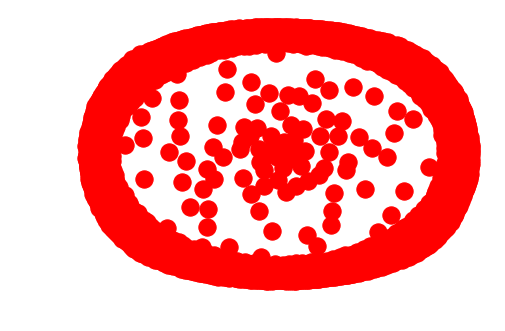

In [478]:
#for i in range(1,length(TG)):
G=TG[0]
nx.draw(G)
plt.savefig("z_net/path.png")
plt.show()

    

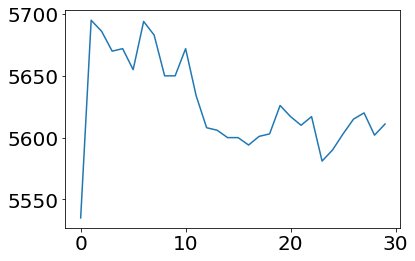

168800
5611
5535
5535
5535
4012


In [479]:
ts=list()
for i in range(0,len(TG)):
    G=TG[i]
    ns=G.nodes
    ts.append(len(ns))
plt.plot(ts)
plt.show()
print(sum(ts))

ts=list()
for i in range(0,len(TG)):
    G=TG[i]
    ns=G.nodes
    ts.append(ns)
    
xx=list(set(ns))
print(len(xx))
print(len(DArray))
print(len(dd))
print(len(do))
print(len(dr))

30


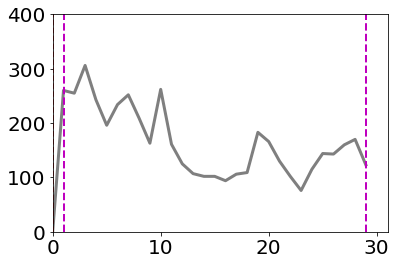

[0, 260, 255, 306, 243, 196, 234, 252, 209, 163, 262, 161, 125, 107, 102, 102, 94, 106, 109, 183, 166, 130, 102, 76, 115, 144, 143, 160, 170, 123]


In [482]:
ts=list()
for i in range(0,len(TG)):
    G=TG[i]
    ns=G.number_of_edges()
    ts.append(ns)
    
print(len(TG))   
plt.plot(ts,color='tab:grey',linewidth=3)

plt.ylim([0,ymax],)
plt.xlim([0,xmax],)
plt.rc('xtick', labelsize=fsize)
plt.rc('ytick', labelsize=fsize)
#plt.axvline(f_s, color='r', linestyle='--')
#plt.axvline(f_e, color='r', linestyle='--')
plt.axvline(f_c, color='r', linestyle='--')
plt.axvline(i_s, color='m', linestyle='--',linewidth=2)
plt.axvline(i_e, color='m', linestyle='--',linewidth=2)

plt.savefig('z_net/allposts' + tag + '.png')
plt.show()
print(ts)

In [483]:
print(xmax)

31


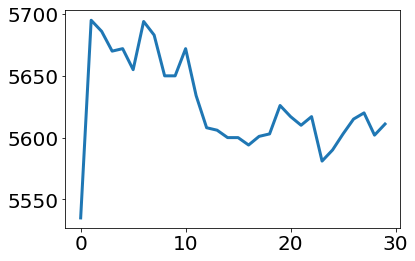

In [484]:
ts=list()
for i in range(0,len(TG)):
    G=TG[i]
    ns=G.nodes
    ts.append(len(ns))
plt.plot(ts,linewidth=3)
plt.show()

In [485]:
ts=list()
for i in range(li,ll):
    G=TG[i]
    ns=G.nodes
    ts.append(list(set(ns)))
xs=list(set(ts[0]))

print(len(xs))
print(len(do));
print(len(TG))
print(len(DArray))

#M = [[0 for x in range(w)] for y in range(h)] 
M = np.zeros(shape=(i_e-i_s+1-li+1,len(DArray)))

for i in range(0,len(do)):
    for t in range(i_s,i_e+1):#len(TG)):
        G=TG[t]
        n=G.node[xs[i]]
        ed=nx.edges(G,xs[i])
        M[t-i_s][i]=len(ed)
        #for e in range(0,len(ed)):

5535
5535
30
5535


In [486]:
print(i_e)

29


(30, 5535)
(30,)


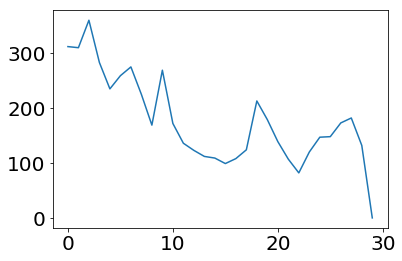

(5535,)


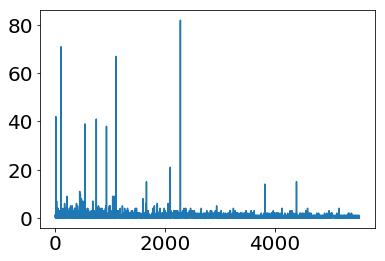

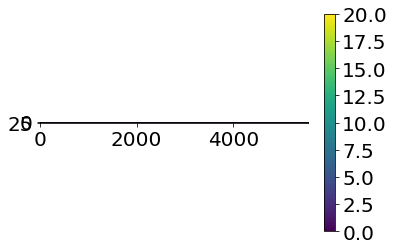

In [487]:
print(M.shape)
ts=M.sum(axis=1)
print(ts.shape)
plt.plot(ts)
plt.show()

ts2=M.sum(axis=0)
print(ts2.shape)
plt.plot(ts2)
plt.savefig('z_net/histogram_sender'+tag+'.png')
plt.show()

plt.imshow(M)
plt.colorbar()
plt.show()
        

[0 0 0 ..., 0 0 0]
(5529,)
(5529, 30)
(30,)
(5,)
(5, 30)
(30,)
(1,)
(1, 30)
(30,)


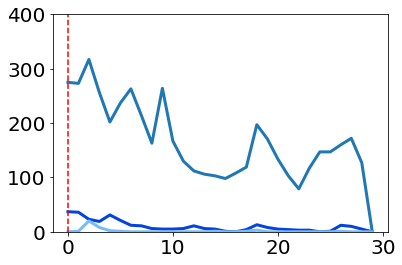

In [489]:
Mt=M.transpose()
km = KMeans(n_clusters=3, random_state=0).fit(Mt)
kl=km.labels_
print(km.labels_)

#[i for i,x in km.labels_ if x == 1]

i=np.where(kl==0)

print(i[0].shape)
X=Mt[i[0],:]
print(X.shape)
if domean:
    ts2=X.mean(axis=0)
else:
    ts2=X.sum(axis=0)
print(ts2.shape)
plt.plot(ts2,color='tab:blue',linewidth=3)

i=np.where(kl==1)

print(i[0].shape)
X=Mt[i[0],:]
print(X.shape)
if domean:
    ts2=X.mean(axis=0)
else:
    ts2=X.sum(axis=0)
print(ts2.shape)
plt.plot(ts2,color='xkcd:blue',linewidth=3)

i=np.where(kl==2)

print(i[0].shape)
X=Mt[i[0],:]
print(X.shape)
if domean:
    ts2=X.mean(axis=0)
else:
    ts2=X.sum(axis=0)
print(ts2.shape)
plt.plot(ts2,color='xkcd:sky blue',linewidth=3)

plt.ylim([0,ymax],)
    
plt.rc('xtick', labelsize=fsize)
plt.rc('ytick', labelsize=fsize)
plt.axvline(0, color='r', linestyle='--')

if domean:
    plt.savefig('z_net/tw' + '-mean' + tag + '.png')
else:
    plt.savefig('z_net/tw' + tag + '.png')
plt.show()

In [490]:
for k in dr:
    print(dr[k])
print(len(dr.keys()))

5535
5536
5537
5538
5539
108
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
1702
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
29
5567
5568
543
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
2279
5581
5582
5583
4464
5584
5585
5586
5587
5588
5589
5590
3880
750
5591
5592
5593
5594
5595
5596
5597
5598
4591
5599
5600
5601
5602
5603
5604
5605
5606
5607
71
5608
5609
5610
5611
5612
5613
3253
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
2533
5633
5634
5635
5636
5637
100
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
935
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
3243
2371
5661
5662
5663
5664
5665
4390
5666
5667
540
410
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
1105
15
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
179
5707
5708
5709
5710
5240
5711
5712
5713
2132

8387
8388
8389
8390
8391
8392
8393
8394
8395
8396
8397
8398
8399
8400
8401
8402
8403
8404
8405
8406
8407
8408
8409
8410
8411
8412
8413
8414
8415
8416
8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
828
8444
4209
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
4236
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
4446
4269
8474
8475
4349
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
4291
8489
8490
8491
8492
8493
4300
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
4338
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
4

(29, 4012)
(29,)


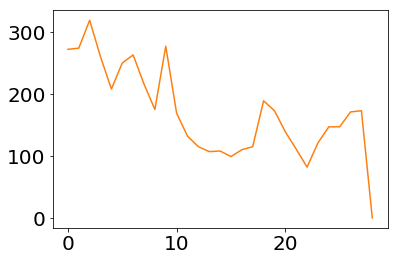

(4012,)


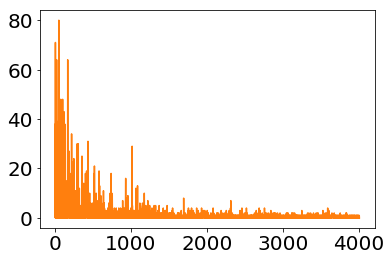

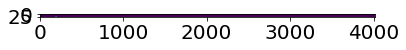

In [491]:
len(dr.keys());
#M = [[0 for x in range(w)] for y in range(h)] 
M2 = np.zeros(shape=(i_e-i_s+1-li,len(dr)))

c=0
for k in dr:
    for t in range(i_s,i_e):#len(TG)):
        G=TG[t]
        ns=G.nodes()
        if dr[k] in ns:
            ed=nx.edges(G,dr[k])
            M2[t-i_s][c]=len(ed)
        else:
            M2[t-i_s][c]=0
    c=c+1
            #for e in range(0,len(ed)):

print(M2.shape)
ts=M2.sum(axis=1)
print(ts.shape)
plt.plot(ts,color='tab:orange')
plt.show()

ts2=M2.sum(axis=0)
print(ts2.shape)
plt.plot(ts2,color='tab:orange')
plt.savefig('z_net/histogram_retweeted'+tag+'.png')
plt.show()

plt.imshow(M2)
plt.show()

In [492]:
print('hola')

hola


[0 0 0 ..., 0 0 0]
(array([   0,    1,    2, ..., 4009, 4010, 4011]),)
(4007,)
(4007, 29)
(29,)
(array([16, 75]),)
(2,)
(2, 29)
(29,)
(array([100, 128, 166]),)
(3,)
(3, 29)
(29,)


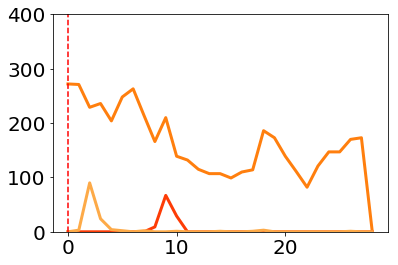

In [493]:
M2t=M2.transpose()
km = KMeans(n_clusters=3, random_state=0).fit(M2t)
kl=km.labels_
print(km.labels_)

#[i for i,x in km.labels_ if x == 1]

i=np.where(kl==0)
print(i)
print(i[0].shape)
X=M2t[i[0],:]
print(X.shape)
if domean:
    ts2=X.mean(axis=0)
else:
    ts2=X.sum(axis=0)
print(ts2.shape)
plt.plot(ts2,color='tab:orange',linewidth=3)
#plt.show()
#savefig('rt_1.png')

i=np.where(kl==1)
print(i)
print(i[0].shape)
X=M2t[i[0],:]
print(X.shape)
if domean:
    ts2=X.mean(axis=0)
else:
    ts2=X.sum(axis=0)
print(ts2.shape)
plt.plot(ts2,color='xkcd:red orange',linewidth=3)
#plt.show()
#savefig('rt_2.png')

i=np.where(kl==2)
print(i)
print(i[0].shape)
X=M2t[i[0],:]
print(X.shape)
if domean:
    ts2=X.mean(axis=0)
else:
    ts2=X.sum(axis=0)
print(ts2.shape)
plt.plot(ts2,color='xkcd:light orange',linewidth=3)

plt.ylim([0,ymax])
    
plt.rc('xtick', labelsize=fsize)
plt.rc('ytick', labelsize=fsize)
plt.axvline(0, color='r', linestyle='--')

if domean:
    plt.savefig('z_net/rt' + '-mean' + tag + '.png')
else:
    plt.savefig('z_net/rt' + tag + '.png')
plt.show()

In [494]:
print(tag)

-houston
